***Project Title : Customer Segmentation using Machine Learning ***




Customer Segmentation - Customer Segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Customers are segmented according to their similarities in behavior and habits

***Project Progress : ***

1. Week 1 : Did the complete study of the project title. Learnt about different different types of Clustering algorithm.
2. Week 2 : Finalised a Mall customers dataset from kaggle. Also explored other algorithms for project implementation like hierarchical clustering.
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
3. Week 3 : Starting with the actual coding of the project. First implemented the Kmeans algorithm. We performed 3 types of analysis to find out the optimal number of clusters i.e Univariate,Bivariate and Multivariate analysis. Bivariate clustering gave the optimal number of clusters for the KMeans algorithm. After KMeans we implemented the Hierarchical clustering algorithm. Here we used a Dendrogram with ward method for finding out the optimal numbers of clusters which turned out to be 5 in both the algorithms.
4. Week 4 : Finishing the project and optimizing the code. 


***Conclusion:*** As we know, clustering is a subjective statistical analysis, and there is more than one appropriate algorithm for every dataset and type of problem.
If there is a specific number of clusters in the dataset, but the group they belong to is unknown, choose K-means. If the distinguishes are based on prior beliefs, hierarchical clustering should be used to know the number of clusters With a large number of variables, K-means compute faster The result of K-means is unstructured, but that of hierarchal is more interpretable and informative.K-Means requires advance knowledge of the clusters in which the dataset is to be divided , while in hierarchical clustering we can stop at any number of clusters and find out the clusters using a dendrogram.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


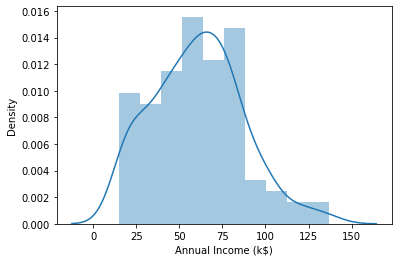

In [ ]:
sns.distplot(df['Annual Income (k$)']);

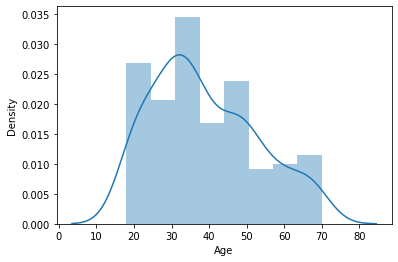

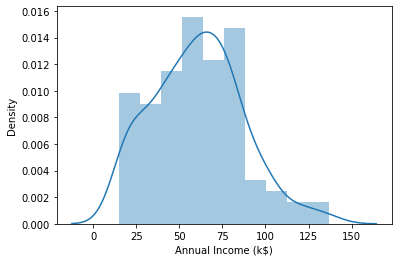

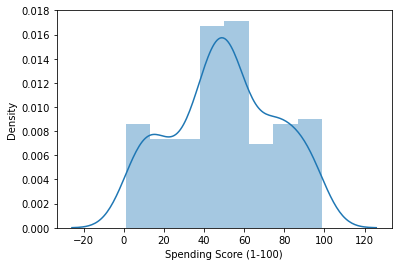

In [ ]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])


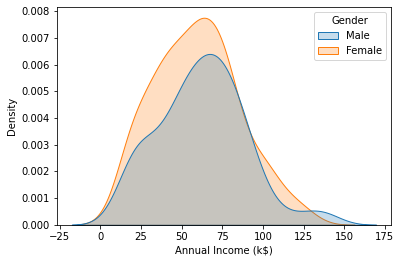

In [ ]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

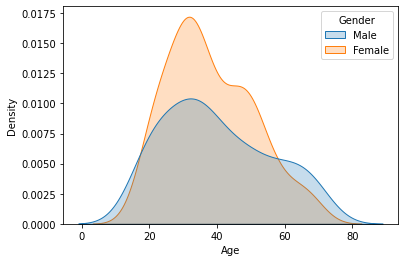

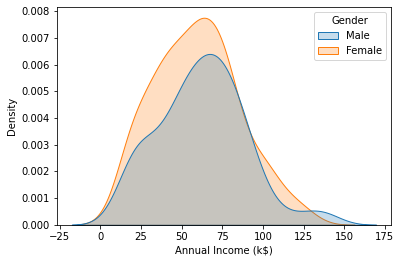

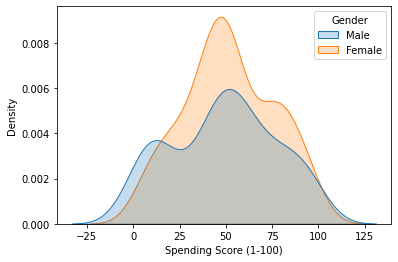

In [ ]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender']);

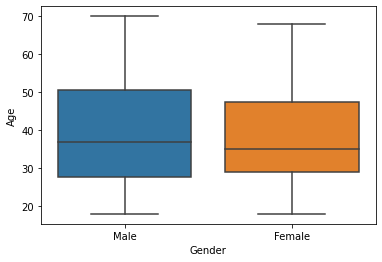

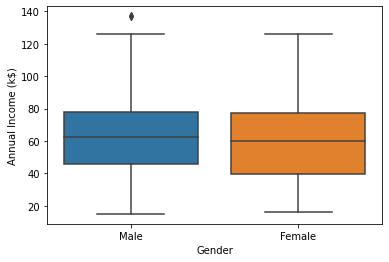

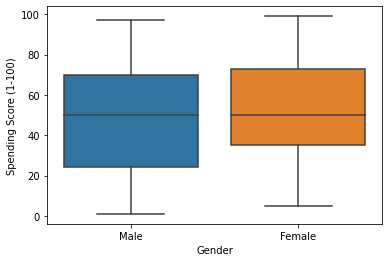

In [ ]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

**Bivariate** Analysis



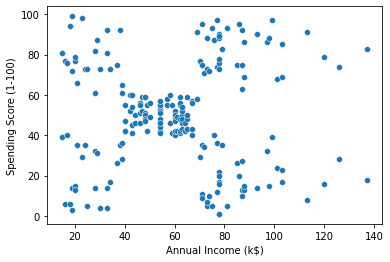

In [ ]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

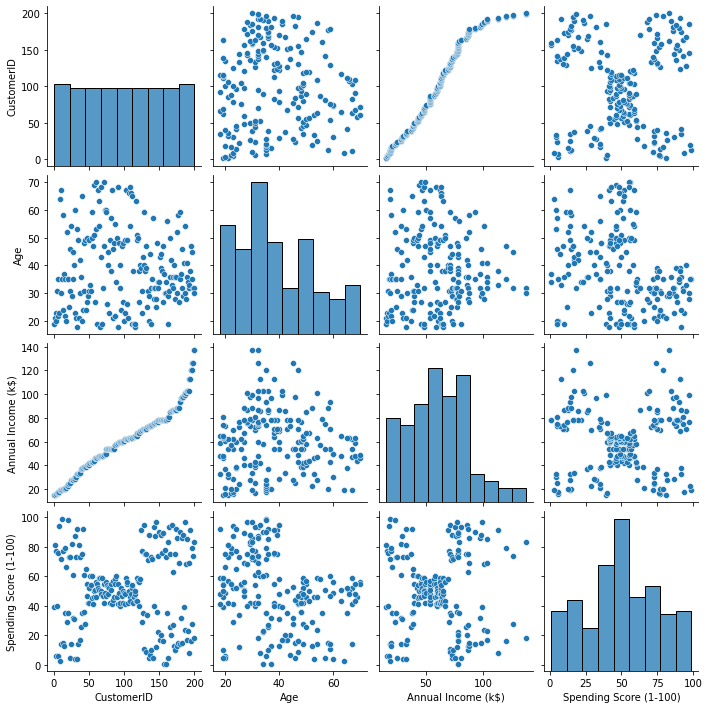

In [ ]:
sns.pairplot(df)

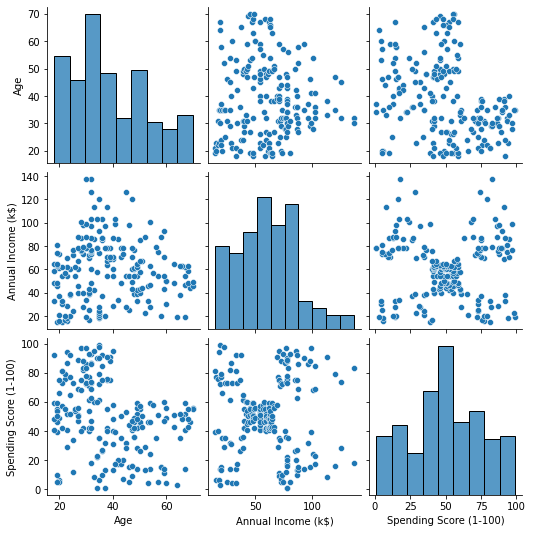

In [ ]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

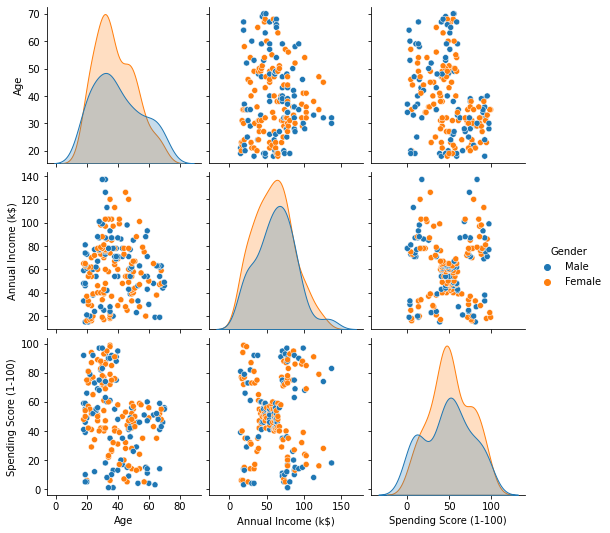

In [ ]:
sns.pairplot(df,hue='Gender')

In [ ]:
# Calculating the mean 
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
# Finding the correlation between variables  
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


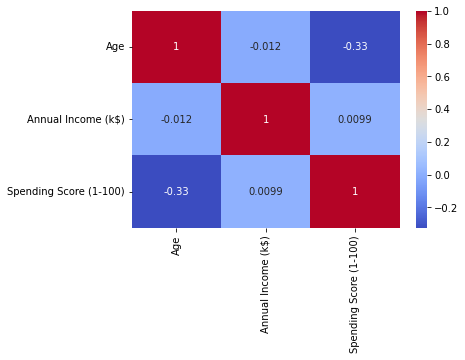

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Starting with the clustering part 
1. Univariate Clustering
2. Bivariate Clustering
3. Multivariate clustering

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
df['Income cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [ ]:
# finding the no. of customersin each cluster 
df['Income cluster'].value_counts()

2    90
1    74
0    36
Name: Income cluster, dtype: int64

In [ ]:
# Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. 
clustering1.inertia_

23517.33093093093

In [ ]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2822.4996947496966,
 2168.4787157287165,
 1767.6406204906211]

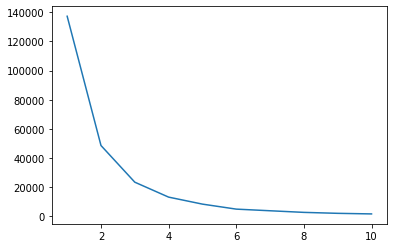

In [ ]:
# using the elbow method 
plt.plot(range(1,11),inertia_scores)

In [ ]:
# anaylsis for univariate 
df.groupby('Income cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [ ]:
# Bivariate Clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,1
2,Female,20,16,6,1,3
3,Female,23,16,77,1,1
4,Female,31,17,40,1,3


In [ ]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

inertia_scores2


[269981.28,
 182440.3076298702,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30552.714025467285,
 25037.985500099654,
 21841.97825674864,
 19704.12354314778]

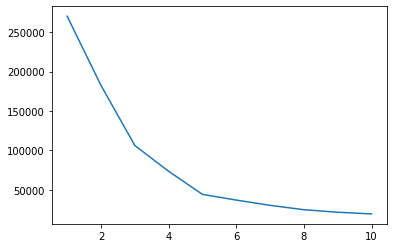

In [ ]:
plt.plot(range(1,11),inertia_scores2)
#  here we can see that the elbow is at 5 

In [ ]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['X','Y']
centers

,X,Y
0,55.296296,49.518519
1,25.727273,79.363636
2,88.200000,17.114286
3,26.304348,20.913043
4,86.538462,82.128205


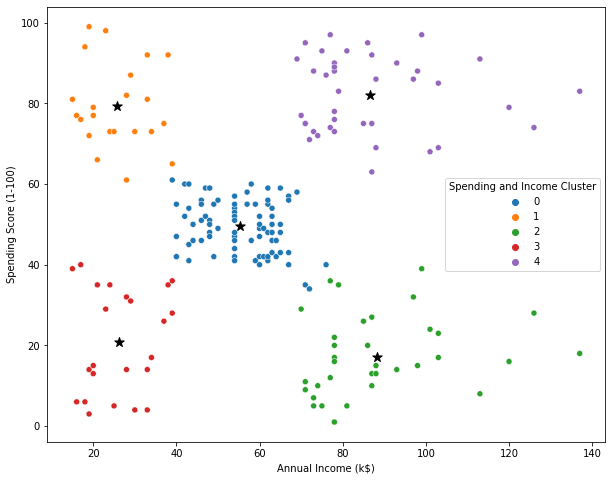

In [ ]:
# visualizing the bivariate
plt.figure(figsize=(10,8))
plt.scatter(x=centers['X'],y=centers['Y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('bivariate_cluster.png')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.457143,0.542857
3,0.608696,0.391304
4,0.538462,0.461538


In [ ]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


In [ ]:
# multivariate clustering =- requires some preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,1
2,Female,20,16,6,1,3
3,Female,23,16,77,1,1
4,Female,31,17,40,1,3


In [ ]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,3,1
1,21,15,81,1,1,1
2,20,16,6,1,3,0
3,23,16,77,1,1,0
4,31,17,40,1,3,0


In [ ]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [ ]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

inertia_scores3

[800.0,
 588.8026767824938,
 476.78755441351586,
 386.8284255837665,
 334.2922503186616,
 275.030671001447,
 240.07012728346436,
 200.25770571058166,
 174.19309570857683,
 152.0867629871069]

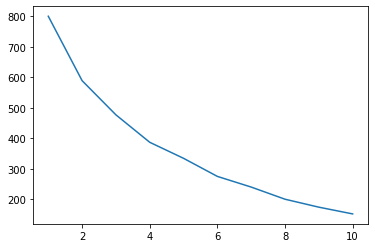

In [ ]:
plt.plot(range(1,11),inertia_scores3)

In [ ]:
# Agglomerative hierachical clustering algorithm 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

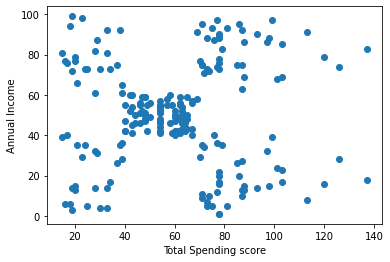

In [ ]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel('Total Spending score')
plt.ylabel('Annual Income')
plt.show()

defining no of clusters

<function matplotlib.pyplot.show>

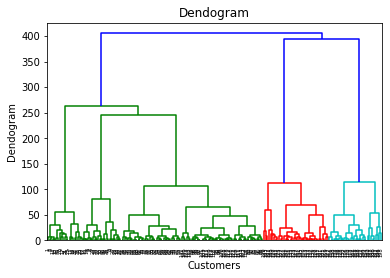

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
#ward method uses Eucledian distance formula
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Dendogram')
plt.show

We got 5 optimum clusters, hence we need to divide the dataset into 5 different categories.

This array tells us the category in which the dataset belongs.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc = hc.fit_predict(X)
Y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

This array will tell you which rows belong to the category 0

In [ ]:
Y_hc==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
X[Y_hc==0,0]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137])

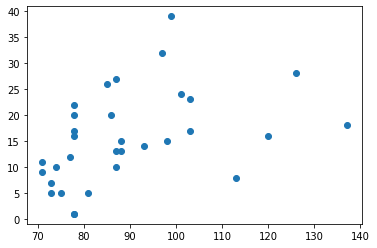

In [ ]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1]) 


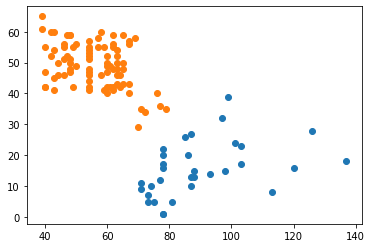

In [ ]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1])
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1])

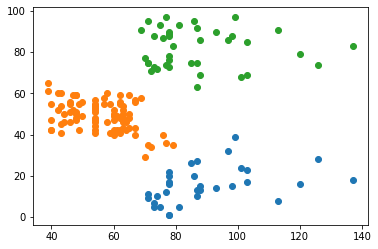

In [ ]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1])
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1])
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1])

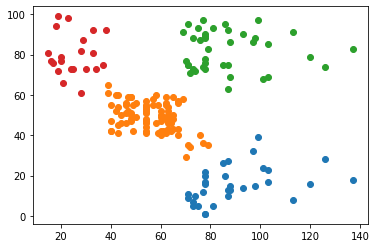

In [ ]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1])
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1])
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1])
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1])

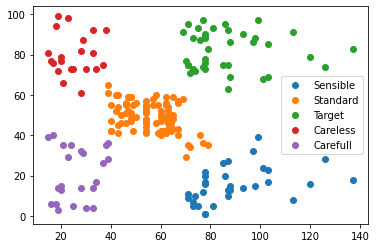

In [ ]:


plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1],label ='Sensible')
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1],label ='Standard')
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1],label ='Target')
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1],label ='Careless')
plt.scatter(X[Y_hc==4,0],X[Y_hc==4,1],label ='Carefull')
plt.legend()
plt.show()



CLUSTER 0:  Blue color= High income and less spend --->SENSIBLE AUDIANCE

CLUSTER 1:  Orange color= medium income and medium spend ---> STANDARD AUDIANCE

CLUSTER 2:  Green color= High income and high spend ---> TARGET CUSTOMER

CLUSTER 3:  Red color=  low income and high spend ---> CARELESS AUDIANCE

CLUSTER 4:  Purple color=  low income and low spend ---> CAREFULL AUDIANCE

In [ ]:
df['Target'] = Y_hc
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
